In [1]:
import yt
import numpy as np

In [2]:
filename = "plt00000"

In [3]:
ds = yt.load(filename)

yt : [INFO     ] 2019-10-06 16:12:19,159 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-10-06 16:12:19,160 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-10-06 16:12:19,161 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-10-06 16:12:19,162 Parameters: domain_right_edge         = [1. 1. 1.]


yt : [INFO     ] 2019-10-06 16:12:19,367 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:12:19,367 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:12:19,369 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:12:19,370 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:12:19,379 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:12:19,415 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999714, Max = 0.999674.
yt : [WARNING  ] 2019-10-06 16:12:19,416 Switching to symlog colorbar scaling unless linear scaling is specified later



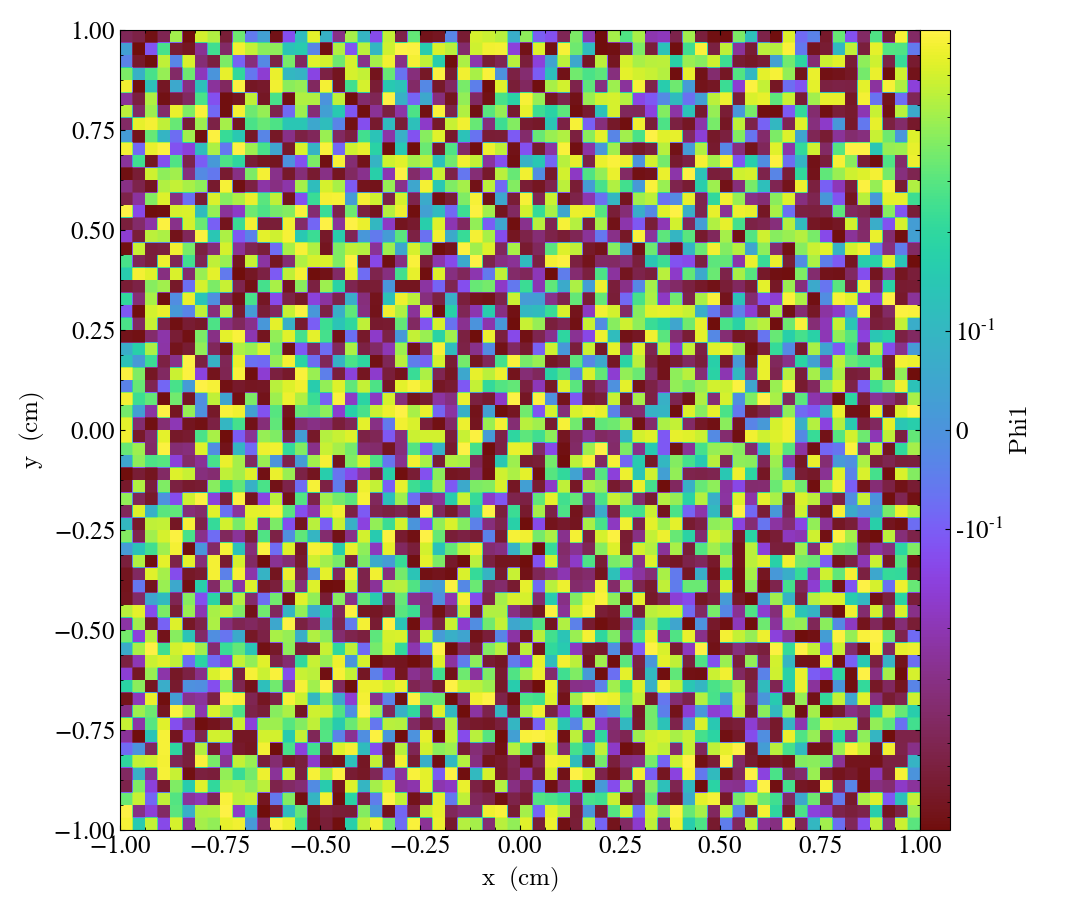

In [4]:
s = yt.SlicePlot(ds, 'z', 'phi1')
s.show()

In [5]:
dx = (ds.domain_right_edge - ds.domain_left_edge)/ds.domain_dimensions
dx

YTArray([0.03125, 0.03125, 0.03125]) code_length

In [6]:
center = 0.5*(ds.domain_right_edge + ds.domain_left_edge)
center

YTArray([0., 0., 0.]) code_length

In [11]:
for i in range(ds.domain_dimensions[2]):
    for f in ['phi1', 'phi2', 'phi3', 'phi4']:
        si = yt.SlicePlot(ds, 'z', f, center=[center[0], center[1], ds.domain_left_edge[2] + dx[2]*i])
        si.save("{}_{}_{:03}.png".format(filename, f, i))

yt : [INFO     ] 2019-10-06 16:15:12,690 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:12,690 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:12,692 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:12,693 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:12,694 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:12,735 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999983, Max = 0.999521.
yt : [WARNING  ] 2019-10-06 16:15:12,736 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:13,019 Saving plot plt00000_phi1_000.png
yt : [INFO     ] 2019-10-06 16:15:13,361 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:13,363 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:13,364 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:13,365 ylim = -1.000000 1.000000
yt : [IN

yt : [INFO     ] 2019-10-06 16:15:21,234 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:21,260 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999239, Max = 0.999468.
yt : [WARNING  ] 2019-10-06 16:15:21,261 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:21,479 Saving plot plt00000_phi4_002.png
yt : [INFO     ] 2019-10-06 16:15:21,673 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:21,674 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:21,675 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:21,675 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:21,678 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:21,699 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999634, Max = 0.999242.
yt : [WARNING 

yt : [WARNING  ] 2019-10-06 16:15:26,952 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:27,169 Saving plot plt00000_phi3_005.png
yt : [INFO     ] 2019-10-06 16:15:27,369 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:27,370 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:27,371 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:27,371 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:27,373 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:27,392 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999721, Max = 0.999632.
yt : [WARNING  ] 2019-10-06 16:15:27,393 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:27,678 Saving plot plt00000_phi4_005.png
yt : [INFO     ] 2019-10-06 16:15:27,875 xlim = -1.000000 1.000000
yt : [INFO     

yt : [INFO     ] 2019-10-06 16:15:34,834 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:34,835 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:34,836 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:34,838 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:34,860 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.999201, Max = 0.999410.
yt : [WARNING  ] 2019-10-06 16:15:34,863 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:35,125 Saving plot plt00000_phi3_008.png
yt : [INFO     ] 2019-10-06 16:15:35,368 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:35,369 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:35,370 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:35,370 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:35,372 Making a fixed resolution buffer o

yt : [WARNING  ] 2019-10-06 16:15:41,147 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.999763, Max = 0.999116.
yt : [WARNING  ] 2019-10-06 16:15:41,148 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:41,413 Saving plot plt00000_phi2_011.png
yt : [INFO     ] 2019-10-06 16:15:41,731 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:41,732 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:41,733 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:41,733 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:41,735 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:41,756 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.999908, Max = 0.999516.
yt : [WARNING  ] 2019-10-06 16:15:41,756 Switching to symlog colorbar scaling unless linear scaling is specified later
yt :

yt : [INFO     ] 2019-10-06 16:15:47,603 Saving plot plt00000_phi1_014.png
yt : [INFO     ] 2019-10-06 16:15:47,877 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:47,878 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:47,878 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:47,879 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:47,880 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:47,905 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.998406, Max = 0.999904.
yt : [WARNING  ] 2019-10-06 16:15:47,906 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:48,193 Saving plot plt00000_phi2_014.png
yt : [INFO     ] 2019-10-06 16:15:48,459 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:48,459 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:48,460 xlim = -1.000000 1.000000


yt : [INFO     ] 2019-10-06 16:15:54,646 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:54,647 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:54,679 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999442, Max = 0.999937.
yt : [WARNING  ] 2019-10-06 16:15:54,680 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:15:55,070 Saving plot plt00000_phi1_017.png
yt : [INFO     ] 2019-10-06 16:15:55,423 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:55,424 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:55,425 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:55,425 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:15:55,427 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:15:55,452 Plot image for field ('boxlib', 'phi2') has both positive a

yt : [WARNING  ] 2019-10-06 16:16:01,120 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:01,377 Saving plot plt00000_phi4_019.png
yt : [INFO     ] 2019-10-06 16:16:01,610 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:01,610 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:01,611 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:01,612 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:01,614 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:01,635 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999667, Max = 0.999515.
yt : [WARNING  ] 2019-10-06 16:16:01,636 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:01,903 Saving plot plt00000_phi1_020.png
yt : [INFO     ] 2019-10-06 16:16:02,211 xlim = -1.000000 1.000000
yt : [INFO     

yt : [INFO     ] 2019-10-06 16:16:07,850 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:07,851 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:07,852 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:07,853 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:07,873 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999522, Max = 0.998772.
yt : [WARNING  ] 2019-10-06 16:16:07,874 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:08,199 Saving plot plt00000_phi4_022.png
yt : [INFO     ] 2019-10-06 16:16:08,436 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:08,437 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:08,438 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:08,438 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:08,439 Making a fixed resolution buffer o

yt : [WARNING  ] 2019-10-06 16:16:14,176 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.999867, Max = 0.999925.
yt : [WARNING  ] 2019-10-06 16:16:14,177 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:14,416 Saving plot plt00000_phi3_025.png
yt : [INFO     ] 2019-10-06 16:16:14,670 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:14,671 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:14,672 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:14,673 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:14,674 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:14,706 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.998713, Max = 0.999587.
yt : [WARNING  ] 2019-10-06 16:16:14,707 Switching to symlog colorbar scaling unless linear scaling is specified later
yt :

yt : [INFO     ] 2019-10-06 16:16:21,303 Saving plot plt00000_phi2_028.png
yt : [INFO     ] 2019-10-06 16:16:21,746 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:21,748 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:21,751 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:21,753 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:21,755 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:21,788 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.997867, Max = 0.999899.
yt : [WARNING  ] 2019-10-06 16:16:21,790 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:22,184 Saving plot plt00000_phi3_028.png
yt : [INFO     ] 2019-10-06 16:16:22,584 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:22,584 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:22,586 xlim = -1.000000 1.000000


yt : [INFO     ] 2019-10-06 16:16:29,249 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:29,251 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:29,273 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.999837, Max = 0.999879.
yt : [WARNING  ] 2019-10-06 16:16:29,273 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:29,532 Saving plot plt00000_phi2_031.png
yt : [INFO     ] 2019-10-06 16:16:29,793 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:29,794 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:29,795 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:29,795 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:29,796 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:29,818 Plot image for field ('boxlib', 'phi3') has both positive a

yt : [WARNING  ] 2019-10-06 16:16:35,507 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:35,789 Saving plot plt00000_phi1_034.png
yt : [INFO     ] 2019-10-06 16:16:36,112 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:36,113 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:36,114 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:36,114 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:36,115 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:36,134 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.999447, Max = 0.999022.
yt : [WARNING  ] 2019-10-06 16:16:36,135 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:36,394 Saving plot plt00000_phi2_034.png
yt : [INFO     ] 2019-10-06 16:16:36,638 xlim = -1.000000 1.000000
yt : [INFO     

yt : [INFO     ] 2019-10-06 16:16:42,473 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:42,474 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:42,475 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:42,476 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:42,497 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.998885, Max = 0.999152.
yt : [WARNING  ] 2019-10-06 16:16:42,498 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:42,781 Saving plot plt00000_phi1_037.png
yt : [INFO     ] 2019-10-06 16:16:43,094 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:43,095 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:43,095 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:43,096 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:43,097 Making a fixed resolution buffer o

yt : [WARNING  ] 2019-10-06 16:16:48,760 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999389, Max = 0.999918.
yt : [WARNING  ] 2019-10-06 16:16:48,760 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:49,010 Saving plot plt00000_phi4_039.png
yt : [INFO     ] 2019-10-06 16:16:49,249 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:49,250 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:49,251 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:49,251 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:49,253 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:49,277 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999696, Max = 0.999746.
yt : [WARNING  ] 2019-10-06 16:16:49,278 Switching to symlog colorbar scaling unless linear scaling is specified later
yt :

yt : [INFO     ] 2019-10-06 16:16:55,367 Saving plot plt00000_phi3_042.png
yt : [INFO     ] 2019-10-06 16:16:55,616 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:55,617 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:55,618 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:55,619 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:55,621 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:16:55,654 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999772, Max = 0.999954.
yt : [WARNING  ] 2019-10-06 16:16:55,654 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:16:56,005 Saving plot plt00000_phi4_042.png
yt : [INFO     ] 2019-10-06 16:16:56,245 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:56,246 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:16:56,247 xlim = -1.000000 1.000000


yt : [INFO     ] 2019-10-06 16:17:01,976 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:01,977 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:01,998 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.999839, Max = 0.999132.
yt : [WARNING  ] 2019-10-06 16:17:01,998 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:02,260 Saving plot plt00000_phi3_045.png
yt : [INFO     ] 2019-10-06 16:17:02,506 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:02,506 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:02,507 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:02,508 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:02,509 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:02,530 Plot image for field ('boxlib', 'phi4') has both positive a

yt : [WARNING  ] 2019-10-06 16:17:10,315 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:10,702 Saving plot plt00000_phi2_048.png
yt : [INFO     ] 2019-10-06 16:17:11,042 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:11,043 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:11,044 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:11,045 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:11,047 Making a fixed resolution buffer of (('boxlib', 'phi3')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:11,070 Plot image for field ('boxlib', 'phi3') has both positive and negative values. Min = -0.998879, Max = 0.999953.
yt : [WARNING  ] 2019-10-06 16:17:11,071 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:11,525 Saving plot plt00000_phi3_048.png
yt : [INFO     ] 2019-10-06 16:17:11,974 xlim = -1.000000 1.000000
yt : [INFO     

yt : [INFO     ] 2019-10-06 16:17:19,859 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:19,860 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:19,860 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:19,862 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:19,895 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.999473, Max = 0.999025.
yt : [WARNING  ] 2019-10-06 16:17:19,896 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:20,284 Saving plot plt00000_phi2_051.png
yt : [INFO     ] 2019-10-06 16:17:20,551 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:20,552 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:20,553 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:20,553 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:20,554 Making a fixed resolution buffer o

yt : [WARNING  ] 2019-10-06 16:17:26,530 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.999965, Max = 0.998110.
yt : [WARNING  ] 2019-10-06 16:17:26,531 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:26,825 Saving plot plt00000_phi1_054.png
yt : [INFO     ] 2019-10-06 16:17:27,156 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:27,157 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:27,158 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:27,159 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:27,160 Making a fixed resolution buffer of (('boxlib', 'phi2')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:27,189 Plot image for field ('boxlib', 'phi2') has both positive and negative values. Min = -0.999713, Max = 0.999909.
yt : [WARNING  ] 2019-10-06 16:17:27,190 Switching to symlog colorbar scaling unless linear scaling is specified later
yt :

yt : [INFO     ] 2019-10-06 16:17:33,785 Saving plot plt00000_phi4_056.png
yt : [INFO     ] 2019-10-06 16:17:34,042 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,043 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,044 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,045 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,046 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:34,070 Plot image for field ('boxlib', 'phi1') has both positive and negative values. Min = -0.998646, Max = 0.999414.
yt : [WARNING  ] 2019-10-06 16:17:34,070 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:34,397 Saving plot plt00000_phi1_057.png
yt : [INFO     ] 2019-10-06 16:17:34,635 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,636 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:34,638 xlim = -1.000000 1.000000


yt : [INFO     ] 2019-10-06 16:17:40,436 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:40,438 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:40,463 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999951, Max = 0.999728.
yt : [WARNING  ] 2019-10-06 16:17:40,464 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:40,730 Saving plot plt00000_phi4_059.png
yt : [INFO     ] 2019-10-06 16:17:40,981 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:40,982 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:40,983 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:40,983 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:40,984 Making a fixed resolution buffer of (('boxlib', 'phi1')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:41,010 Plot image for field ('boxlib', 'phi1') has both positive a

yt : [WARNING  ] 2019-10-06 16:17:47,619 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:47,886 Saving plot plt00000_phi3_062.png
yt : [INFO     ] 2019-10-06 16:17:48,157 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:48,158 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:48,159 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:48,160 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-10-06 16:17:48,162 Making a fixed resolution buffer of (('boxlib', 'phi4')) 800 by 800
yt : [WARNING  ] 2019-10-06 16:17:48,192 Plot image for field ('boxlib', 'phi4') has both positive and negative values. Min = -0.999944, Max = 0.999652.
yt : [WARNING  ] 2019-10-06 16:17:48,193 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-10-06 16:17:48,531 Saving plot plt00000_phi4_062.png
yt : [INFO     ] 2019-10-06 16:17:48,794 xlim = -1.000000 1.000000
yt : [INFO     